In [1]:
import loaders.cityprotect as cp

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
dept = "Santa Clara County Office of the Sheriff"

In [20]:
df = cp.cityprotect("../data/raw_data/{}".format(dept.replace(" ", "_")))

Loading from 24 files.
Data file ../data/raw_data/Santa_Clara_County_Office_of_the_Sheriff/Apr_Jun_2017_Santa_Clara_County_Office_of_the_Sheriff_report.csv is empty.
Data file ../data/raw_data/Santa_Clara_County_Office_of_the_Sheriff/Jan_Mar_2017_Santa_Clara_County_Office_of_the_Sheriff_report.csv is empty.


In [4]:
parentIncident_types = set([a.strip() for b in df['parentIncidentType'].str.split(';').values for a in b])

In [5]:
monthly = {k: df[df["parentIncidentType"] == k].groupby(pd.Grouper(key="date", freq="M"))
           for k in parentIncident_types}

In [6]:
monthly_df = pd.DataFrame({k: monthly[k].count()["ccn"] for k in parentIncident_types}).fillna(0)

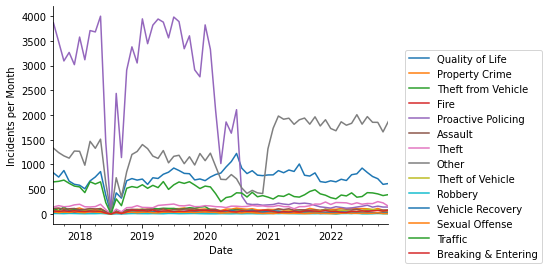

In [7]:
ax = monthly_df.plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [17]:
prop_list = ["Breaking & Entering", "Property Crime", "Theft of Vehicle", "Theft from Vehicle", "Theft"]

In [15]:
violent_list = ["Assault", "Robbery", "Sexual Offense"]

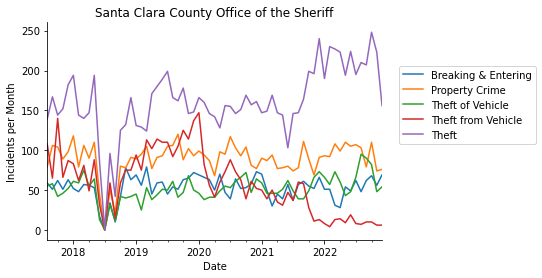

In [21]:
ax = monthly_df[prop_list].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
ax.set(title=dept)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()


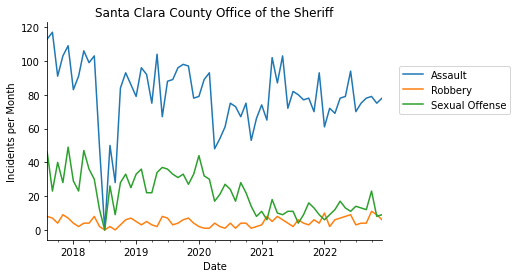

In [22]:
ax = monthly_df[violent_list].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
ax.set(title=dept)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [14]:
parentIncident_types

{'Assault',
 'Breaking & Entering',
 'Fire',
 'Other',
 'Proactive Policing',
 'Property Crime',
 'Quality of Life',
 'Robbery',
 'Sexual Offense',
 'Theft',
 'Theft from Vehicle',
 'Theft of Vehicle',
 'Traffic',
 'Vehicle Recovery'}